# E-Commerce data: Context
Data Set Information: The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user profile, or period

# Content :
The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label. "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

# Acknoledgements :
Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018).



In [248]:
#Import libraries

In [249]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [250]:
#SQL query implementation

In [251]:
!pip install pandas pandasql


# STEP ONE - DATA CLEANING

In [252]:
import pandas as pd
from pandasql import sqldf

In [253]:
#Load the dataset 

In [254]:
df= pd.read_csv('Desktop/online_shoppers_intention 2.csv')

In [255]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [256]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [257]:
#SQL Query testing

In [258]:
query = '''
SELECT COUNT(Administrative) AS count_of_administrative
FROM df
WHERE Administrative_Duration = 0.0
'''

In [259]:
query

'\nSELECT COUNT(Administrative) AS count_of_administrative\nFROM df\nWHERE Administrative_Duration = 0.0\n'

In [260]:
result_df = sqldf(query)


In [261]:
result_df 

,count_of_administrative
0,5903


In [262]:
#Data Quality Checking 

In [263]:
#Chekcing the data type 

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### The data type looks fine. There is no issue with the data type. 

In [265]:
#Data Summary exploration

In [266]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [267]:
corr_matrix = df.corr()


In [268]:
corr_matrix 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


In [269]:
#Check for missing values


In [270]:
missing_values = df.isna().sum()

In [271]:
print(missing_values)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


### It seemes that there are no missing values in this dataset 

In [272]:
#Chekcing for duplicate values 

In [273]:
df.duplicated().sum()

125

In [274]:
print(df.duplicated().sum())

125


In [275]:
df.drop_duplicates(inplace=True)

In [276]:
df.duplicated().sum()

0

### There are 125 duplicated values. We have remove those duplicated values 

In [277]:
# Check for outliers 

In [278]:
import pandas as pd
import matplotlib.pyplot as plt

In [279]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

{'whiskers': [<matplotlib.lines.Line2D at 0x7fea1929c2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fea1929c9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fea1928dee0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fea192a7130>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fea192a74c0>],
 'means': []}

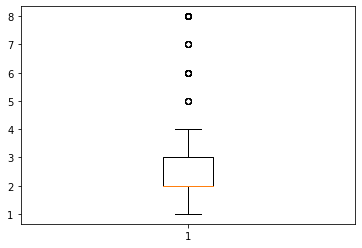

In [281]:
plt.boxplot(df['OperatingSystems'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe9c95074f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe9c053f2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe9c9507670>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe9c053fa00>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe9c053fd90>,
 'means': []}

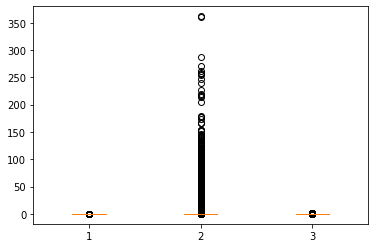

In [282]:
plt.boxplot(df[['ExitRates', 'PageValues', 'SpecialDay']])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fea196670a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fea196677c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fea19677cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fea19667ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe9f95a62b0>],
 'means': []}

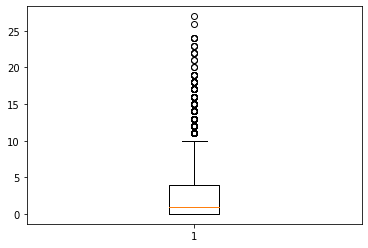

In [283]:
plt.boxplot(df['Administrative'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fea19aef850>,
 'caps': [<matplotlib.lines.Line2D at 0x7fea19aeff70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fea19aef490>],
 'medians': [<matplotlib.lines.Line2D at 0x7fea19ae36d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fea19ae3a60>],
 'means': []}

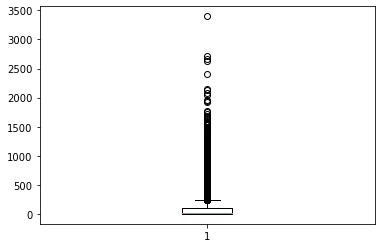

In [284]:
plt.boxplot(df['Administrative_Duration'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fea196ab0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fea196ab6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fea196bbd60>],
 'medians': [<matplotlib.lines.Line2D at 0x7fea196abdc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fea196de190>],
 'means': []}

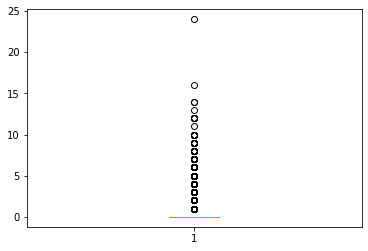

In [285]:
plt.boxplot(df['Informational'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fea19a928e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe9f8bb1040>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fea19a92550>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe9f8bb1760>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe9f8bb1af0>,
 'means': []}

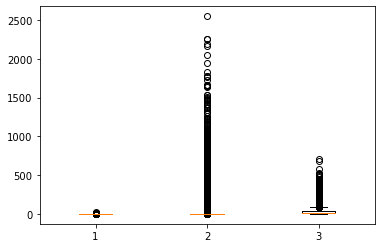

In [286]:
plt.boxplot(df[['Informational',
       'Informational_Duration', 'ProductRelated']])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fea19cc01f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fea19cc0910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fea19cb0e20>,
 'medians': [<matplotlib.lines.Line2D at 0x7fea19cc9070>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fea19cc9400>,
 'means': []}

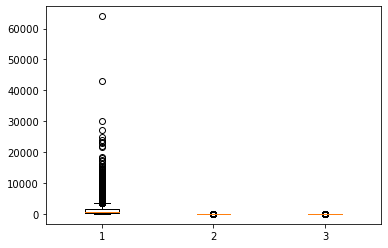

In [287]:
plt.boxplot(df[['ProductRelated_Duration',
       'BounceRates', 'ExitRates']])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe9f8b85fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe9f8b96700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe9f8b85b80>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe9f8b96e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe9f8ba11f0>],
 'means': []}

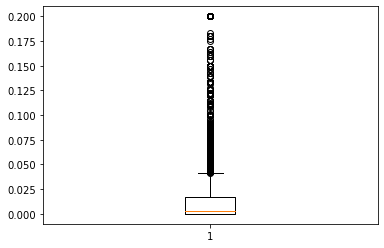

In [288]:
plt.boxplot(df['BounceRates'])

In [290]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

# It is apparent that there are issues with the outlier.  We can use log transformation to operate with the outtlier. 

# STEP TWO : KPI INDICATORS AND FEATURE DEVELOPMENT 

In [291]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

### First KPI and new feature is Average time per page. I have choosen this KPI because it will be helpful to understand which pages are more engaging and might require optimization. Here, I cacnluated the average time per page for administative, informational, and product related pages. 

# I used both Python and SQL Queries to develop KPI 

# Average Time Spent Per Page 

In [402]:
df['avg_administrative_time']= df['Administrative_Duration']/df['Administrative']

In [403]:
df['avg_informational_time']= df['Informational_Duration']/df['Informational']

In [404]:
df['avg_product_related_time']=df['ProductRelated_Duration']/df['ProductRelated']

In [405]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'avg_administrative_time',
       'avg_informational_time', 'product_related_time',
       'avg_product_related_time', 'Total_interactions', 'Bounch_Exit_Rates'],
      dtype='object')

In [406]:
df.to_csv('my_data.csv', index=False)


In [407]:
query = '''
SELECT Administrative_Duration/Administrative, 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'avg_administrative_time',
       'avg_informational_time', 'product_related_time'
FROM df
'''
result_df1 = sqldf(query)

In [408]:
result_df1 = sqldf(query)


In [409]:
result_df1

,Administrative_Duration/Administrative,'BounceRates','ExitRates','PageValues','SpecialDay','Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Revenue','avg_administrative_time','avg_informational_time','product_related_time'
0,NaN,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,avg_administrative_time,avg_informational_time,product_related_time
1,NaN,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,avg_administrative_time,avg_informational_time,product_related_time
2,NaN,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,avg_administrative_time,avg_informational_time,product_related_time
3,NaN,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,avg_administrative_time,avg_informational_time,product_related_time
4,NaN,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,avg_administrative_time,avg_informational_time,product_related_time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,48.333333,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,avg_administrative_time,avg_informational_time,product_related_time
12201,NaN,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,avg_administrative_time,avg_informational_time,product_related_time
12202,NaN,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,avg_administrative_time,avg_informational_time,product_related_time
12203,18.750000,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,avg_administrative_time,avg_informational_time,product_related_time


# Total Interactions

## The second KPI I choose is the interaction rate. I measured the total interaction by summing the values in the Administrative, informational and product related columns. Then I divded it when Revenue = False. That the user interacted with the website but did not purchase analyting

In [410]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'avg_administrative_time',
       'avg_informational_time', 'product_related_time',
       'avg_product_related_time', 'Total_interactions', 'Bounch_Exit_Rates'],
      dtype='object')

In [411]:
df['Total_interactions'] = df['Administrative']+df['Informational']+df['ProductRelated']

In [412]:
(df['Total_interactions']).sum()

425872

In [413]:
425872/10297


41.3588423812761

In [414]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType,VisitorType,Weekend,Revenue,avg_administrative_time,avg_informational_time,product_related_time,avg_product_related_time,Total_interactions,Bounch_Exit_Rates
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,Returning_Visitor,False,False,NaN,NaN,0.000000,0.000000,1,0.00
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,2,Returning_Visitor,False,False,NaN,NaN,32.000000,32.000000,2,-0.10
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,3,Returning_Visitor,False,False,NaN,NaN,0.000000,0.000000,1,0.00
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,4,Returning_Visitor,False,False,NaN,NaN,1.333333,1.333333,2,-0.09
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,4,Returning_Visitor,True,False,NaN,NaN,62.750000,62.750000,10,-0.03


# KPI: Difference between BounchRates and ExitRates

## My third KPI is to determine the difference between Bounch and Exit Rates. A higher difference indicates that visitors are bouncing more frequently rather than leaving the site after visiting multiple pages.

In [415]:
df['Bounch_Exit_Rates'] =df['BounceRates']-df['ExitRates']

In [416]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'avg_administrative_time',
       'avg_informational_time', 'product_related_time',
       'avg_product_related_time', 'Total_interactions', 'Bounch_Exit_Rates'],
      dtype='object')

In [417]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType,VisitorType,Weekend,Revenue,avg_administrative_time,avg_informational_time,product_related_time,avg_product_related_time,Total_interactions,Bounch_Exit_Rates
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,Returning_Visitor,False,False,NaN,NaN,0.000000,0.000000,1,0.00
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,2,Returning_Visitor,False,False,NaN,NaN,32.000000,32.000000,2,-0.10
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,3,Returning_Visitor,False,False,NaN,NaN,0.000000,0.000000,1,0.00
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,4,Returning_Visitor,False,False,NaN,NaN,1.333333,1.333333,2,-0.09
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,4,Returning_Visitor,True,False,NaN,NaN,62.750000,62.750000,10,-0.03


# KPI: Purchase Intent


#  I have created another KPI which is purchase intent. This is based on the revenue. If the revenue is 1 then the purchase is 1, while the revenue is 0 then the purchase is also 0 

In [418]:
df['Purchase'] = df['Revenue'].apply(lambda x: 1 if x==1 else 0)


In [419]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,VisitorType,Weekend,Revenue,avg_administrative_time,avg_informational_time,product_related_time,avg_product_related_time,Total_interactions,Bounch_Exit_Rates,Purchase
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,Returning_Visitor,False,False,NaN,NaN,0.000000,0.000000,1,0.00,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,Returning_Visitor,False,False,NaN,NaN,32.000000,32.000000,2,-0.10,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,Returning_Visitor,False,False,NaN,NaN,0.000000,0.000000,1,0.00,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,Returning_Visitor,False,False,NaN,NaN,1.333333,1.333333,2,-0.09,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,Returning_Visitor,True,False,NaN,NaN,62.750000,62.750000,10,-0.03,0


In [420]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'avg_administrative_time',
       'avg_informational_time', 'product_related_time',
       'avg_product_related_time', 'Total_interactions', 'Bounch_Exit_Rates',
       'Purchase'],
      dtype='object')

In [421]:
df['Month']

0        Feb
1        Feb
2        Feb
3        Feb
4        Feb
        ... 
12325    Dec
12326    Nov
12327    Nov
12328    Nov
12329    Nov
Name: Month, Length: 12205, dtype: object

# KPI: Seasonality 

# My another KPI is Seasonality. My objective is to identify any seasonality patterns in visitor behavior

In [424]:
seasons = {'January': 'Winter', 'February': 'Winter', 'March': 'Spring', 'April': 'Spring',
           'May': 'Spring', 'June': 'Summer', 'July': 'Summer', 'August': 'Summer',
           'September': 'Fall', 'October': 'Fall', 'November': 'Fall', 'December': 'Winter'}

In [425]:
df['Season'] = df['Month'].map(seasons)


In [426]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'avg_administrative_time',
       'avg_informational_time', 'product_related_time',
       'avg_product_related_time', 'Total_interactions', 'Bounch_Exit_Rates',
       'Purchase', 'Season'],
      dtype='object')

# KPI: User Engagement Score

# I added a new feature user engagement score by combining page values, bounch rates, and exit rates. 

In [429]:
df['User_Engagement_score']= df['BounceRates']+df['ExitRates']+df['PageValues']

In [430]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'avg_administrative_time',
       'avg_informational_time', 'product_related_time',
       'avg_product_related_time', 'Total_interactions', 'Bounch_Exit_Rates',
       'Purchase', 'Season', 'User_Engagement_score'],
      dtype='object')

# Site Performance Score

# I have added a new feature which combines both bounce rate and traffic rate. I have added this feature to identify which pages on my website are causing visitors to leave and provide insights into areas for improvement.

In [431]:
df['site_performance_score']=df['BounceRates']+df['ExitRates']

In [432]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'avg_administrative_time',
       'avg_informational_time', 'product_related_time',
       'avg_product_related_time', 'Total_interactions', 'Bounch_Exit_Rates',
       'Purchase', 'Season', 'User_Engagement_score',
       'site_performance_score'],
      dtype='object')

# Coversion Rate by Traffic Type

We will measure the convesion rate in Tableau. We will measure it by calcuaing the the percentage of users who make.a purchase. 

I have created a new feature that combines the 'VisitorType' and 'SpecialDay' columns to calculate a visitor loyalty score. This helps me to identify which types of visitors are most loyal to my brand and provide insights into what drives loyalty. 

# Save the dataframe to a CSV file

In [436]:
df.to_csv('data.csv', index=False)


# Now I will transoform and visualize my all findings to the Tableau dashboard. 